In [1]:
import os
import sqlite3
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import dateutil
import pylab as py
import seaborn as sns
import scipy 
from scipy import stats
import sklearn.metrics
from numpy  import array
import glob
import functools
from functools import reduce
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\jjojeda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


In [93]:
# load the soil dataset
df=pd.read_csv(r'C:\Users\jjojeda\Google Drive\COALAR\Sorgo\Soil\soil_parametrisation\data.csv')

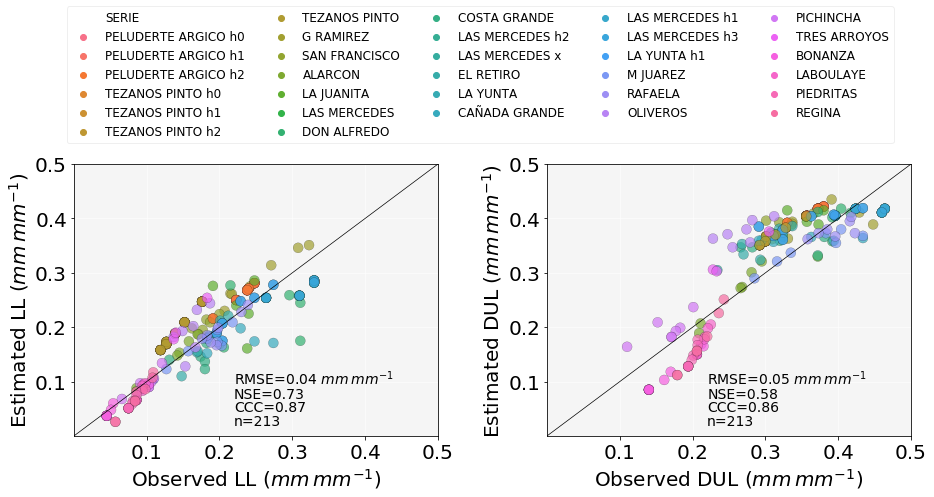

In [95]:
kwargs  =   {'edgecolor':"k"}
#Plotting the results
fig = plt.figure(figsize=(15,5))

ax=plt.subplot(1, 2, 1)

#ax.set_title('15km x 15km',fontsize= 25,weight='bold') 
#ax.title.set_position([0.5,1.01])

sns.scatterplot(x="LLo", y="LLe",hue='SERIE', alpha=0.7,data=df,linewidth=0.2,**kwargs,s=100)

plt.plot([0,0.5],[0,0.5],"-",color="k", linewidth=0.7)

# Formatting graph and background
plt.legend(prop=dict(size=12),bbox_to_anchor=(-0.02, 1.58), loc=2, borderaxespad=0., ncol=5, framealpha=0.3)
plt.ylabel('Estimated LL ($mm\,mm^{-1}$)', fontsize =20)
plt.xlabel('Observed LL ($mm\,mm^{-1}$)', fontsize =20)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([0.0001,0.5])
ax.set_ylim([0.0001,0.5])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=True)

#Taking data from dataframe to a list
Obs = pd.Series(df.LLo.values)
y_o= Obs.tolist()
Pre = pd.Series(df.LLe.values)
y_p= Pre.tolist()
#Converting from a list to an arange
y_obs = array(y_o).round(decimals=2)
y_pre = array(y_p).round(decimals=2)

def rmse(y_obs, y_pre):
    """ Compute RMSE between two time series """
    return np.sqrt(np.mean(np.square(y_pre - y_obs))).round(decimals=2)

#Get the values
RMSEb=rmse(y_obs, y_pre)
RMSE=str(RMSEb)
SumOfSquaredResiduals=((np.square(y_pre - y_obs))).sum()
SumOfSquaredSD=(np.square(y_obs-(np.mean(y_obs)))).sum()
NSEb = (1 - SumOfSquaredResiduals / SumOfSquaredSD).round(decimals=2)
NSE=str(NSEb)
count=df['SERIE'].count()

#plt.text(0, 0.41,'a',fontsize=30,color='k',weight='bold')
plt.text(0.22, 0.095,'RMSE='+RMSE+' $mm\,mm^{-1}$',fontsize=14,color='k')
plt.text(0.22, 0.07,'NSE='+NSE,fontsize=14,color='k')
plt.text(0.22, 0.045,'CCC=0.87',fontsize=14,color='k')
plt.text(0.22, 0.02,'n='+str(count),fontsize=14,color='k')

#######################
ax=plt.subplot(1, 2, 2)

#ax.set_title('15km x 15km',fontsize= 25,weight='bold') 
#ax.title.set_position([0.5,1.01])

sns.scatterplot(x="DULo", y="DULe",hue='SERIE', alpha=0.7,data=df,linewidth=0.2,**kwargs,s=100)

plt.plot([0,0.5],[0,0.5],"-",color="k", linewidth=0.7)

# Formatting graph and background
plt.legend(prop=dict(size=12),bbox_to_anchor=(0.01, 1.4), loc=2, borderaxespad=0., ncol=6, framealpha=0.3)
plt.ylabel('Estimated DUL ($mm\,mm^{-1}$)', fontsize =20)
plt.xlabel('Observed DUL ($mm\,mm^{-1}$)', fontsize =20)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([0.0001,0.5])
ax.set_ylim([0.0001,0.5])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=True)

#Taking data from dataframe to a list
Obs = pd.Series(df.DULo.values)
y_o= Obs.tolist()
Pre = pd.Series(df.DULe.values)
y_p= Pre.tolist()
#Converting from a list to an arange
y_obs = array(y_o).round(decimals=2)
y_pre = array(y_p).round(decimals=2)

def rmse(y_obs, y_pre):
    """ Compute RMSE between two time series """
    return np.sqrt(np.mean(np.square(y_pre - y_obs))).round(decimals=2)

#Get the values
RMSEb=rmse(y_obs, y_pre)
RMSE=str(RMSEb)
SumOfSquaredResiduals=((np.square(y_pre - y_obs))).sum()
SumOfSquaredSD=(np.square(y_obs-(np.mean(y_obs)))).sum()
NSEb = (1 - SumOfSquaredResiduals / SumOfSquaredSD).round(decimals=2)
NSE=str(NSEb)
count=df['SERIE'].count()

#plt.text(0, 0.41,'a',fontsize=30,color='k',weight='bold')
plt.text(0.22, 0.095,'RMSE='+RMSE+' $mm\,mm^{-1}$',fontsize=14,color='k')
plt.text(0.22, 0.07,'NSE='+NSE,fontsize=14,color='k')
plt.text(0.22, 0.045,'CCC=0.86',fontsize=14,color='k')
plt.text(0.22, 0.02,'n='+str(count),fontsize=14,color='k')
ax.get_legend().remove()

plt.subplots_adjust(wspace=0.3, hspace=0)
#plt.savefig(r'C:\Users\jjojeda\Google Drive\COALAR\Sorgo\Soil\cal.png', dpi=300,bbox_inches='tight')

In [30]:
#Look for specific experiments
a=df[(df['LLe'] < 0.1) & (df['LLo'] > 0.2)]
a

,SERIE,LOC,SLB,SLMH,LLo,DULo,SATo,SRGF,SSKS,SBDM,...,SLNI,SLHW,SLHB,SCEC,LL,DUL,SAT,LLe,DULe,SATe
89,LAS MERCEDES,PARANA,120.0,CR,0.23,0.454,0.507,0.2,NaN,1.44,...,NaN,8.3,6.8,NaN,8.3,32.3,40.0,0.083,0.323,0.4
106,LAS MERCEDES h2,PARANA,120.0,CR,0.23,0.454,0.507,0.2,NaN,1.44,...,NaN,8.3,6.8,NaN,8.3,32.3,40.0,0.083,0.323,0.4
111,LAS MERCEDES x,PARANA,120.0,CR,0.23,0.454,0.507,0.2,NaN,1.44,...,NaN,8.3,6.8,NaN,8.3,32.3,40.0,0.083,0.323,0.4
136,LAS MERCEDES h1,PARANA,120.0,CR,0.23,0.454,0.507,0.2,NaN,1.44,...,NaN,8.3,6.8,NaN,8.3,32.3,40.0,0.083,0.323,0.4
141,LAS MERCEDES h3,PARANA,120.0,CR,0.23,0.454,0.507,0.2,NaN,1.44,...,NaN,8.3,6.8,NaN,8.3,32.3,40.0,0.083,0.323,0.4


In [41]:
df['SERIE'].count()

198

In [62]:
df.describe()

,SLB,LLo,DULo,SATo,SRGF,SSKS,SBDM,SLSI,SAND,SLCL,...,SLNI,SLHW,SLHB,SCEC,LL,DUL,SAT,LLe,DULe,SATe
count,198.000000,198.000000,198.000000,198.000000,198.000000,14.000000,198.000000,198.000000,198.000000,198.000000,...,56.000000,181.000000,92.000000,67.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,72.808081,0.188051,0.326273,0.400278,0.584343,0.452857,1.305505,51.610606,15.729293,32.660101,...,0.112679,7.075138,6.189130,33.249254,19.811111,35.253030,48.227273,0.198111,0.352530,0.482273
std,48.446197,0.069948,0.076803,0.072380,0.373497,0.272183,0.116608,16.756268,22.435377,11.737119,...,0.070052,0.723948,0.733119,8.838078,6.664070,8.298331,4.880362,0.066641,0.082983,0.048804
min,4.000000,0.045000,0.110000,0.127000,0.000000,0.150000,1.010000,7.700000,1.500000,7.000000,...,0.020000,5.500000,5.300000,23.800000,3.700000,8.500000,38.500000,0.037000,0.085000,0.385000
25%,34.000000,0.137500,0.292000,0.383000,0.200000,0.150000,1.230000,46.200000,4.100000,25.925000,...,0.050000,6.500000,5.500000,24.900000,16.375000,35.150000,44.800000,0.163750,0.351500,0.448000
50%,65.500000,0.183000,0.328000,0.390000,0.500000,0.680000,1.260000,54.600000,5.100000,32.200000,...,0.095000,6.900000,5.800000,31.400000,19.800000,37.500000,48.700000,0.198000,0.375000,0.487000
75%,104.000000,0.238000,0.373000,0.427250,1.000000,0.680000,1.410000,64.500000,10.750000,42.000000,...,0.170000,7.600000,6.700000,42.500000,25.400000,40.500000,51.400000,0.254000,0.405000,0.514000
max,255.000000,0.330000,0.464000,0.604000,2.000000,0.680000,1.590000,77.000000,85.300000,64.700000,...,0.260000,8.400000,8.300000,47.900000,35.100000,43.500000,64.300000,0.351000,0.435000,0.643000
